In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


We have a dataset about a penguins with some missing values(max in th one column: 11). It is not possible to input sex of penguins correctly, but we need to know the sex of each penguins for our analysis. So let's drop the rows where we have missing values

In [7]:
penguins = penguins.dropna(subset=['bill_length_mm'])
penguins = penguins.dropna(subset=['sex'])
penguins.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [8]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [10]:
penguins['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

We have three penguin species from three islands.

In [55]:
penguins_count = penguins.groupby('species').size().reset_index(name='count')
penguins_count

,species,count
0,Adelie,146
1,Chinstrap,68
2,Gentoo,119


Species Distribution: Use a bar chart to show the distribution of penguin species.

In [16]:
import plotly.express as px


fig = px.bar(penguins_count, x='species', y='count', color='species', title="Distribution of Penguin Species")
fig.show()


In [58]:
penguins_spec_island = penguins.groupby(['island', 'species']).size().reset_index(name='count')
penguins_spec_island

,island,species,count
0,Biscoe,Adelie,44
1,Biscoe,Gentoo,119
2,Dream,Adelie,55
3,Dream,Chinstrap,68
4,Torgersen,Adelie,47


In [67]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots with the correct type for pie charts
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
# Get unique islands
islands = penguins_spec_island['island'].unique()
# Create pie charts for each island
for i, island in enumerate(islands, start=1):
    island_data = penguins_spec_island[penguins_spec_island['island'] == island]
    fig.add_trace(go.Pie(labels=island_data['species'],
                         values=island_data['count'],
                         name=island),
                  1, i)
# Update layout and show the figure
fig.update_layout(title_text="Penguin Species Distribution by Island")
fig.show()

Adelie penguins are on the all three islands. But Gentoo and Chinstrap are presented only on one island: Gentoo on Biscoe,Chinstrap on  Dream.

Flipper Length vs. Body Mass: Create a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.

In [19]:
fig = px.scatter(penguins, x='flipper_length_mm', y='body_mass_g', color='species',  labels={
                     "flipper_length_mm": "Flipper length  (mm)",
                     "body_mass_g": "Body mass, (g)",
                     "species": "Species of penguins"
                 }, title="Relationship between flipper length and body mass")
fig.show()


Here we see that Gentoo specie differ from another two species. The Gentoo penguins have bigger body mass and longer flipper length.

Island Distribution: Visualize the count of penguins on each island using a pie chart.

In [23]:
penguins_island = penguins.groupby('island').size().reset_index(name='count')
penguins_island.head()

,island,count
0,Biscoe,163
1,Dream,123
2,Torgersen,47


In [26]:
fig = px.pie(penguins_island, values='count', names='island',  color='island', title="The count of penguins on each island ")
fig.show()


Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.

In [29]:
penguins_sex = penguins.groupby(['species', 'sex']).size().reset_index(name='count')

In [38]:
fig = px.bar(penguins_sex, x='species', y= 'count', color='sex', title="Distribution of sex within each penguin species")
fig.show()

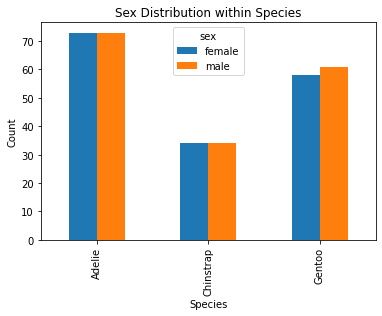

In [34]:
# Create a new DataFrame with species and sex counts
sex_distribution = penguins.groupby(['species', 'sex']).size().unstack()

# Plot the grouped bar chart
sex_distribution.plot(kind='bar', stacked=False)
plt.title('Sex Distribution within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

The ditribution of sex almost the same for each Species

Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.

<AxesSubplot:>

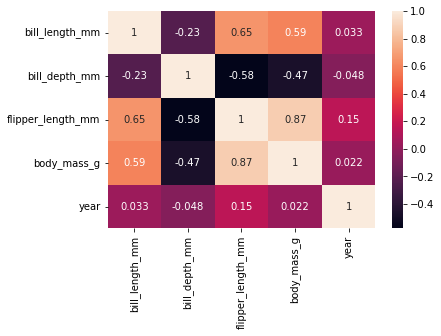

In [40]:
sns.heatmap(penguins.corr(), annot = True)

We see a correlation between flipper length and bill length

Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.

In [49]:
fig = px.box(penguins, x="species", y="bill_length_mm", title="Boxplots for bill  length, segmented by species")

fig.show()

In [50]:

fig = px.box(penguins, x="species", y="flipper_length_mm", title="Boxplots for flipper length, segmented by species")
fig.show()

In [51]:

fig = px.box(penguins, x="species", y="body_mass_g", title="Boxplots for body mass, segmented by species")
fig.show()

It is interesting that Gentoo species have greater body mass and longer bill and flipper, but Chinstrap have longer bill. We can say that this is a peculiarity of the specie

Histograms of Measurements: Create histograms to show the distribution of key measurements (bill length, bill depth, flipper length).

In [52]:
fig = px.histogram(penguins, x="bill_depth_mm", title = 'Distribution of bill depth')
fig.show()

In [53]:
fig = px.histogram(penguins, x="flipper_length_mm", title = 'Distribution of flipper length')
fig.show()

In [54]:
fig = px.histogram(penguins, x="bill_length_mm", title = 'Distribution of bill length')
fig.show()